In [13]:
import pandas as pd
import numpy as np

In [14]:
dataset = pd.read_csv('updated_data.csv')
dataset.head()

,Gender,bodyFrame_Breadth,skin_Nature,skin_Color,weight_Changes,nails_color,teeth_Color,teeth_Shape,recalling_speed,memorizing_speed,...,appetite_Frequency,bladder_Frequency,perspiration_Amount,stool_Consistency,mental_Power,physical_Power,Anger_Freq,Irritability_speed,speech_Argumentative,class
0,Male,Thin/Narrow,Dry,Whitish,Gainandloseeasily,Pink,MilkyWhite,Regular,Moderately,Moderately,...,Regular,Regular,Medium,Medium,Grade1,Grade2,Good,Quickly,Non_Argumentative,Vata
1,Male,Broad,Normal,Whitish,Gainandloseeasily,Reddish,MilkyWhite,Regular,Moderately,Moderately,...,Regular,Regular,Medium,Medium,Grade2,Grade3,Poor,Slowly,Non_Argumentative,Kapha
2,Male,Thin/Narrow,Dry,Whitish,Difficultyingaining,Pink,Yellowish,Irregular,Slowly,Moderately,...,Irregular,Regular,Medium,Hard,Grade1,Grade2,Poor,Moderately,Non_Argumentative,Vata
3,Male,Thin/Narrow,Dry,FairPaleYellow,Difficultyingaining,Pink,Dull/Blackish,Regular,Variably,Quickly,...,Irregular,Regular,Medium,Hard,Grade1,Grade1,Medium,Quickly,Non_Argumentative,Vata
4,Male,Broad,Normal,Dark,Gaineasilyandlosewithdifficulty,Pink,MilkyWhite,Regular,Moderately,Slowly,...,Regular,Regular,Medium,Medium,Grade2,Grade3,Good,Moderately,Non_Argumentative,Kapha


In [15]:
def print_unique_values():
    for column in dataset:
        print(f'{column}:\t\t {dataset[column].unique()}')
print_unique_values()

Gender:		 ['Male' 'Female']
bodyFrame_Breadth:		 ['Thin/Narrow' 'Broad' 'Medium']
skin_Nature:		 ['Dry' 'Normal' 'Oily' 'Seasonal/Variable']
skin_Color:		 ['Whitish' 'FairPaleYellow' 'Dark' 'FairReddish' 'FairPink']
weight_Changes:		 ['Gainandloseeasily' 'Difficultyingaining'
 'Gaineasilyandlosewithdifficulty' 'Stable']
nails_color:		 ['Pink' 'Reddish' 'PaleYellow']
teeth_Color:		 ['MilkyWhite' 'Yellowish' 'Dull/Blackish']
teeth_Shape:		 ['Regular' 'Irregular']
recalling_speed:		 ['Moderately' 'Slowly' 'Variably' 'Quickly']
memorizing_speed:		 ['Moderately' 'Quickly' 'Slowly' 'Variably']
sleep_Amount:		 ['Medium' 'High' 'Low' 'Variable']
sleep_Quality:		 ['Sound' 'Deep' 'Shallow']
speaking_Amount:		 ['Moderate' 'Less' 'Excessive']
speaking_Speed:		 ['Medium' 'Quick' 'Slow' 'Variable']
walking_Speed:		 ['Quick/Fast/Brisk' 'Medium' 'Slow' 'Variable']
bowel_Freq:		 ['Regular' 'Irregular' 'Variable']
retainingFriends_quality:		 ['Medium' 'Poor' 'Good']
dreams_Amount:		 ['Low' 'Medium' 'Hig

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_encoded = dataset.apply(le.fit_transform)

data_encoded.head()

,Gender,bodyFrame_Breadth,skin_Nature,skin_Color,weight_Changes,nails_color,teeth_Color,teeth_Shape,recalling_speed,memorizing_speed,...,appetite_Frequency,bladder_Frequency,perspiration_Amount,stool_Consistency,mental_Power,physical_Power,Anger_Freq,Irritability_speed,speech_Argumentative,class
0,1,2,0,4,1,1,1,1,0,0,...,1,1,2,2,0,1,0,1,1,2
1,1,0,1,4,1,2,1,1,0,0,...,1,1,2,2,1,2,2,2,1,0
2,1,2,0,4,0,1,2,0,2,0,...,0,1,2,0,0,1,2,0,1,2
3,1,2,0,1,0,1,0,1,3,1,...,0,1,2,0,0,0,1,1,1,2
4,1,0,1,0,2,1,1,1,0,2,...,1,1,2,2,1,2,0,0,1,0


In [17]:
X=data_encoded.iloc[:,:-1].values
y=data_encoded.iloc[:,-1].values

print(X.shape)

(147, 34)


In [18]:
list(le.classes_)

['Kapha', 'Pitta', 'Vata']

In [19]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
le = LabelEncoder()

# Dictionary to store label encoders for each column
label_encoders = {}

# Fit and transform the data
data_encoded = dataset.apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)

# Save the mappings
for column in dataset.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    dataset[column] = le.fit_transform(dataset[column])
    label_encoders[column] = dict(zip(le.classes_, le.transform(le.classes_)))

# Print the mappings
for column, mapping in label_encoders.items():
    print(f"Column: {column}")
    print(mapping)

Column: Gender
{'Female': 0, 'Male': 1}
Column: bodyFrame_Breadth
{'Broad': 0, 'Medium': 1, 'Thin/Narrow': 2}
Column: skin_Nature
{'Dry': 0, 'Normal': 1, 'Oily': 2, 'Seasonal/Variable': 3}
Column: skin_Color
{'Dark': 0, 'FairPaleYellow': 1, 'FairPink': 2, 'FairReddish': 3, 'Whitish': 4}
Column: weight_Changes
{'Difficultyingaining': 0, 'Gainandloseeasily': 1, 'Gaineasilyandlosewithdifficulty': 2, 'Stable': 3}
Column: nails_color
{'PaleYellow': 0, 'Pink': 1, 'Reddish': 2}
Column: teeth_Color
{'Dull/Blackish': 0, 'MilkyWhite': 1, 'Yellowish': 2}
Column: teeth_Shape
{'Irregular': 0, 'Regular': 1}
Column: recalling_speed
{'Moderately': 0, 'Quickly': 1, 'Slowly': 2, 'Variably': 3}
Column: memorizing_speed
{'Moderately': 0, 'Quickly': 1, 'Slowly': 2, 'Variably': 3}
Column: sleep_Amount
{'High': 0, 'Low': 1, 'Medium': 2, 'Variable': 3}
Column: sleep_Quality
{'Deep': 0, 'Shallow': 1, 'Sound': 2}
Column: speaking_Amount
{'Excessive': 0, 'Less': 1, 'Moderate': 2}
Column: speaking_Speed
{'Medium'

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import Input

model = Sequential([
    Input((34,)),
    Dense(34, activation='relu'),
    Dense(30, activation='relu'),
    Dropout(0.2),
    Dense(20, activation='relu'),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
4/4 [==============================] - 2s 5ms/step - loss: 1.1062 - accuracy: 0.3333
Epoch 2/50
4/4 [==============================] - 0s 7ms/step - loss: 1.0658 - accuracy: 0.3846
Epoch 3/50
4/4 [==============================] - 0s 6ms/step - loss: 1.0048 - accuracy: 0.4957
Epoch 4/50
4/4 [==============================] - 0s 3ms/step - loss: 0.9667 - accuracy: 0.6068
Epoch 5/50
4/4 [==============================] - 0s 5ms/step - loss: 0.9536 - accuracy: 0.6325
Epoch 6/50
4/4 [==============================] - 0s 5ms/step - loss: 0.9100 - accuracy: 0.6752
Epoch 7/50
4/4 [==============================] - 0s 3ms/step - loss: 0.8794 - accuracy: 0.7009
Epoch 8/50
4/4 [==============================] - 0s 5ms/step - loss: 0.8463 - accuracy: 0.7521
Epoch 9/50
4/4 [==============================] - 0s 3ms/step - loss: 0.7813 - accuracy: 0.7778
Epoch 10/50
4/4 [==============================] - 0s 5ms/step - loss: 0.7566 - accuracy: 0.7949
Epoch 11/50
4/4 [======================

In [12]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 310ms/step - loss: 0.2568 - accuracy: 0.9667


[0.2568081021308899, 0.9666666388511658]

In [13]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)

1/1 [==============================] - 0s 200ms/step


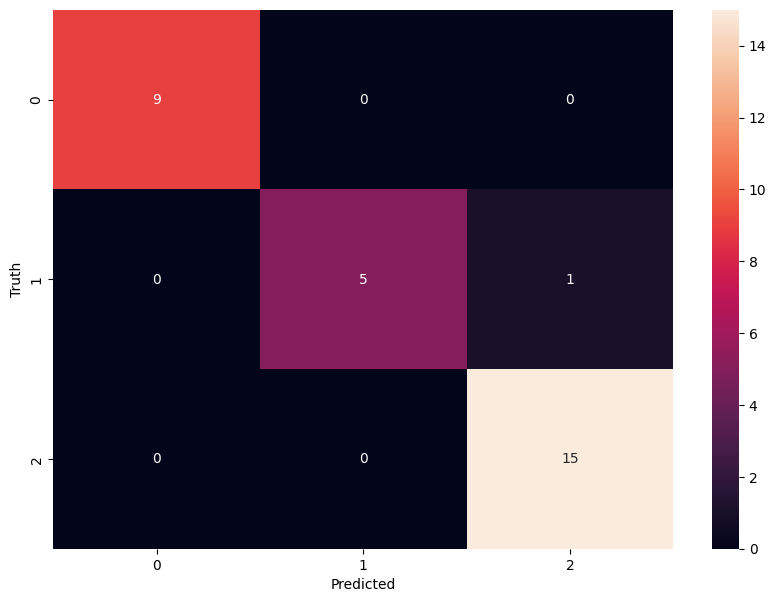

In [15]:
import seaborn as sn
import tensorflow as tf
import matplotlib.pyplot as plt
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [16]:
model.save('local_model.keras')

In [17]:
print(X_test[5])
print(X_test[5].shape)

[1 2 0 4 0 0 2 0 2 2 1 1 2 0 1 1 1 2 1 3 2 2 1 1 2 1 1 1 2 0 1 1 2 1]
(34,)


In [18]:
print(y_test[5])

2


In [19]:
pred5 = model.predict(X_test[5].reshape(1, 34))
pred = np.argmax(pred5, axis=1)[0]

1/1 [==============================] - 0s 49ms/step


In [20]:
print(pred)

2


In [23]:
model.save_weights('local_model.weights.h5')

In [21]:
print(X_train[0])

[1 0 1 4 3 1 1 1 1 0 2 2 2 0 0 1 1 1 1 0 1 0 1 1 2 1 1 2 2 2 2 0 2 1]


In [22]:
print(y_train[0])

0
